*Initial attempt at working with the fairy tale "Hansel and Gretel" and implementing it in code.*
*Based on the "Hansel and Gretel" word document.*

This implementation focuses on the "path-finding" algorithm used by Hansel.

### Extracted Story

Hansel and Gretel were scared. They knew the forest was deep and dark, and that it was easy to get lost.
"Don't worry! I have a plan!" whispered Hansel to Gretel. He went to the back of the house and filled his pockets with white pebbles from the garden.
Then the two children started walking, following their stepmother’s directions. Every few steps, Hansel dropped a little white pebble on the ground.
...
Hansel waited until the moon was bright. The moonlight shone through the tall trees and made his tiny white pebbles glow. They followed the trail of pebbles all the way back home.

### User Stories

* As HANSEL I want to...
    * drop pebbles to mark my path from home
    * follow my dropped pebbles to get back home

### Assumptions

* Pebbles are not necessarily placed in a straight line.
* Hansel keeps track of which pebbles he has already visited.

### Design Decisions

* Hansel's path is modelled as a 2d graph where each pebble dropped has its coordinate in this two dimensional space.
* A "random walk" is generated to simulate Hansel's path. This works by simply generating random points within a radius from an origin, providied that these points bring Hansel closer to the destination.
* Hansel works his way back based on which pebbles are visible from his current location. This may be one pebble, or it may be more. The path he picks is not necessarily the same one which lead him to the destination. He may visit less pebbles, or he may get stuck by visiting the "wrong" ones.

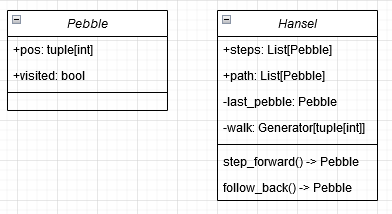

In [21]:
RADIUS = 15
START_POINT = (0, 0)
END_POINT = (100, 100)

In [22]:
import random
import math


def get_random_point(radius, centerX, centerY):
    # https://stackoverflow.com/a/50746409
    r = radius * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    return centerX + r * math.cos(theta), centerY + r * math.sin(theta)


def gen_random_walk(origin, end, radius):
    distance = math.dist(origin, end)
    last_point = origin
    
    yield origin
    
    while distance > radius:
        new_point = get_random_point(radius, *last_point)
        dist = math.dist(new_point, end)
        
        while dist >= distance:
            new_point = get_random_point(radius, *last_point)
            dist = math.dist(new_point, end)

        distance = dist
        last_point = new_point
        
        yield last_point
    
    yield end

    
def check_visibility(current_point, points, view_distance):
    visible = []

    for p in points:
        if p == current_point:
            continue

        if math.dist(p, current_point) <= view_distance:
            visible.append(p)

    return visible

In [23]:
class Pebble():
    def __init__(self, position, visited=False):
        self.pos = position
        self.visited = visited
    
    def __repr__(self):
        return f'<Pebble {self.pos}>'

In [24]:
class Hansel:
    def __init__(self):
        self.steps = []  # dropped pebbles
        self.path = []   # path taken when following pebbles backwards
        
        self._last_pebble = None  # marker when moving backwards
        self._walk = gen_random_walk(START_POINT, END_POINT, RADIUS)  # step generator
    
    def step_forward(self):
        '''Move forward, dropping a pebble.'''
        try:
            p = Pebble(next(self._walk))
        except StopIteration:
            return
        
        self.steps.append(p)
        return p
    
    def follow_back(self):
        '''Follow the laid pebbles backwards.'''
        if self._last_pebble is None:
            next_pebble = self.steps[-1]
        else:
            if self._last_pebble.pos == START_POINT:
                return
            
            visible_locations = check_visibility(
                self._last_pebble.pos,
                [x.pos for x in self.steps],
                RADIUS
            )

            try:
                next_pebble = next(
                    x for x in self.steps if x.pos in visible_locations and not x.visited
                )
            except StopIteration:
                next_pebble = None
        
        if next_pebble is not None:
            self._last_pebble = next_pebble
            self._last_pebble.visited = True
            self.path.append(self._last_pebble)
            return self._last_pebble

In [ ]:
if __name__ == '__main__':
    hansel = Hansel()
    
    # step forward
    while hansel.step_forward() is not None:
        ...
    
    # step backward
    while hansel.follow_back() is not None:
        ...

In [ ]:
def visualize(steps_forward, return_path):
    '''
    Visualize Hansel's path.
    
    :param steps_forward: list of pebbles
    :param return_path: list of pebbles
    '''
    import matplotlib.pyplot as plt
    
    # draw graph
    fig, ax = plt.subplots()
    
    for p in steps_forward:
        if p in return_path:
            plt.plot(*p.pos, 'ro')
            ax.annotate(return_path.index(p), (p.pos[0] + 1, p.pos[1] + 1))
        else:
            plt.plot(*p.pos, 'bo')
    
    plt.show()

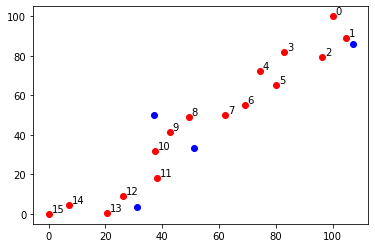

In [25]:
visualize(hansel.steps, hansel.path)